In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "all_z"
key = "z"
quantile = "0"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  3.48it/s]

12it [00:00,  4.90it/s]

22it [00:00,  6.86it/s]

32it [00:00,  9.51it/s]

40it [00:00, 12.91it/s]

50it [00:00, 17.44it/s]

61it [00:00, 23.13it/s]

70it [00:01, 28.97it/s]

78it [00:01, 35.27it/s]

89it [00:01, 44.13it/s]

98it [00:01, 51.01it/s]

107it [00:01, 58.38it/s]

119it [00:01, 68.24it/s]

131it [00:01, 77.34it/s]

143it [00:01, 85.38it/s]

155it [00:01, 92.07it/s]

166it [00:02, 95.29it/s]

177it [00:02, 98.90it/s]

188it [00:02, 101.95it/s]

199it [00:02, 99.87it/s] 

211it [00:02, 103.01it/s]

223it [00:02, 105.29it/s]

234it [00:02, 106.60it/s]

245it [00:02, 107.21it/s]

257it [00:02, 108.28it/s]

268it [00:02, 105.54it/s]

279it [00:03, 102.32it/s]

290it [00:03, 99.33it/s] 

302it [00:03, 102.59it/s]

313it [00:03, 99.18it/s] 

325it [00:03, 102.68it/s]

336it [00:03, 104.77it/s]

347it [00:03, 105.70it/s]

359it [00:03, 107.18it/s]

371it [00:03, 108.93it/s]

382it [00:04, 109.06it/s]

394it [00:04, 109.97it/s]

406it [00:04, 90.95it/s] 

416it [00:04, 85.33it/s]

427it [00:04, 89.64it/s]

438it [00:04, 94.71it/s]

448it [00:04, 95.50it/s]

458it [00:04, 93.21it/s]

469it [00:04, 96.75it/s]

480it [00:05, 99.28it/s]

492it [00:05, 102.52it/s]

503it [00:05, 103.47it/s]

515it [00:05, 105.67it/s]

526it [00:05, 106.27it/s]

538it [00:05, 107.46it/s]

549it [00:05, 108.14it/s]

560it [00:05, 108.11it/s]

571it [00:05, 108.56it/s]

583it [00:06, 109.18it/s]

595it [00:06, 109.65it/s]

606it [00:06, 109.73it/s]

617it [00:06, 109.00it/s]

629it [00:06, 110.23it/s]

641it [00:06, 109.60it/s]

652it [00:06, 106.87it/s]

663it [00:06, 91.06it/s] 

673it [00:06, 90.64it/s]

683it [00:07, 83.55it/s]

694it [00:07, 89.28it/s]

706it [00:07, 93.08it/s]

716it [00:07, 94.81it/s]

727it [00:07, 96.60it/s]

739it [00:07, 100.39it/s]

750it [00:07, 102.67it/s]

761it [00:07, 97.82it/s] 

771it [00:07, 89.99it/s]

781it [00:08, 89.32it/s]

791it [00:08, 89.80it/s]

803it [00:08, 95.53it/s]

815it [00:08, 99.76it/s]

826it [00:08, 102.32it/s]

837it [00:08, 101.55it/s]

849it [00:08, 104.39it/s]

860it [00:08, 105.85it/s]

871it [00:08, 97.05it/s] 

882it [00:09, 99.62it/s]

894it [00:09, 102.77it/s]

906it [00:09, 104.67it/s]

918it [00:09, 107.02it/s]

930it [00:09, 109.34it/s]

942it [00:09, 111.06it/s]

954it [00:09, 112.75it/s]

966it [00:09, 113.39it/s]

978it [00:10, 93.30it/s] 

988it [00:10, 94.66it/s]

1000it [00:10, 99.23it/s]

1011it [00:10, 101.84it/s]

1023it [00:10, 104.23it/s]

1035it [00:10, 106.35it/s]

1046it [00:10, 107.35it/s]

1057it [00:10, 106.10it/s]

1069it [00:10, 107.99it/s]

1081it [00:10, 108.39it/s]

1093it [00:11, 109.56it/s]

1104it [00:11, 109.35it/s]

1115it [00:11, 102.25it/s]

1127it [00:11, 105.11it/s]

1138it [00:11, 100.39it/s]

1150it [00:11, 103.90it/s]

1162it [00:11, 106.20it/s]

1173it [00:11, 104.10it/s]

1184it [00:11, 103.33it/s]

1195it [00:12, 102.56it/s]

1207it [00:12, 104.86it/s]

1218it [00:12, 104.24it/s]

1229it [00:12, 93.13it/s] 

1241it [00:12, 98.02it/s]

1252it [00:12, 98.60it/s]

1264it [00:12, 101.86it/s]

1275it [00:12, 103.84it/s]

1287it [00:12, 105.81it/s]

1299it [00:13, 107.26it/s]

1310it [00:13, 107.67it/s]

1321it [00:13, 92.85it/s] 

1331it [00:13, 94.70it/s]

1341it [00:13, 95.74it/s]

1352it [00:13, 99.09it/s]

1363it [00:13, 97.88it/s]

1375it [00:13, 102.49it/s]

1386it [00:13, 104.46it/s]

1397it [00:14, 102.92it/s]

1408it [00:14, 97.48it/s] 

1419it [00:14, 98.30it/s]

1431it [00:14, 102.25it/s]

1442it [00:14, 104.38it/s]

1454it [00:14, 105.93it/s]

1466it [00:14, 107.27it/s]

1478it [00:14, 109.36it/s]

1489it [00:14, 101.41it/s]

1500it [00:15, 98.86it/s] 

1512it [00:15, 102.66it/s]

1524it [00:15, 105.06it/s]

1536it [00:15, 107.25it/s]

1547it [00:15, 90.12it/s] 

1557it [00:15, 91.47it/s]

1567it [00:15, 86.66it/s]

1577it [00:15, 89.03it/s]

1589it [00:16, 94.60it/s]

1600it [00:16, 97.11it/s]

1611it [00:16, 99.46it/s]

1622it [00:16, 100.70it/s]

1633it [00:16, 102.24it/s]

1644it [00:16, 102.93it/s]

1655it [00:16, 92.38it/s] 

1665it [00:16, 86.56it/s]

1674it [00:16, 83.90it/s]

1685it [00:17, 88.11it/s]

1695it [00:17, 89.41it/s]

1705it [00:17, 83.14it/s]

1714it [00:17, 77.62it/s]

1723it [00:17, 80.34it/s]

1732it [00:17, 81.87it/s]

1741it [00:17, 81.75it/s]

1751it [00:17, 85.49it/s]

1762it [00:17, 89.69it/s]

1773it [00:18, 94.33it/s]

1783it [00:18, 84.21it/s]

1792it [00:18, 84.59it/s]

1803it [00:18, 89.52it/s]

1814it [00:18, 92.92it/s]

1824it [00:18, 85.86it/s]

1834it [00:18, 89.49it/s]

1844it [00:18, 85.93it/s]

1855it [00:18, 90.39it/s]

1867it [00:19, 95.80it/s]

1877it [00:19, 91.03it/s]

1887it [00:19, 89.91it/s]

1899it [00:19, 95.74it/s]

1911it [00:19, 100.30it/s]

1922it [00:19, 100.19it/s]

1933it [00:19, 101.41it/s]

1945it [00:19, 104.41it/s]

1957it [00:19, 106.88it/s]

1969it [00:20, 106.80it/s]

1980it [00:20, 105.38it/s]

1992it [00:20, 107.30it/s]

2003it [00:20, 108.02it/s]

2015it [00:20, 106.09it/s]

2026it [00:20, 101.87it/s]

2037it [00:20, 103.99it/s]

2049it [00:20, 105.61it/s]

2060it [00:20, 105.72it/s]

2072it [00:21, 107.44it/s]

2084it [00:21, 108.26it/s]

2095it [00:21, 108.55it/s]

2107it [00:21, 109.00it/s]

2119it [00:21, 110.04it/s]

2131it [00:21, 109.97it/s]

2143it [00:21, 110.10it/s]

2155it [00:21, 110.09it/s]

2167it [00:21, 109.17it/s]

2178it [00:22, 108.44it/s]

2189it [00:22, 107.25it/s]

2200it [00:22, 107.02it/s]

2211it [00:22, 106.72it/s]

2222it [00:22, 102.14it/s]

2233it [00:22, 103.80it/s]

2245it [00:22, 105.82it/s]

2256it [00:22, 106.91it/s]

2267it [00:22, 107.33it/s]

2279it [00:22, 108.48it/s]

2291it [00:23, 109.19it/s]

2302it [00:23, 109.11it/s]

2313it [00:23, 109.01it/s]

2325it [00:23, 109.98it/s]

2337it [00:23, 110.35it/s]

2349it [00:23, 110.15it/s]

2361it [00:23, 110.86it/s]

2373it [00:23, 111.22it/s]

2385it [00:23, 107.70it/s]

2396it [00:24, 107.71it/s]

2407it [00:24, 107.85it/s]

2418it [00:24, 108.34it/s]

2429it [00:24, 106.03it/s]

2441it [00:24, 107.29it/s]

2453it [00:24, 108.58it/s]

2465it [00:24, 109.37it/s]

2477it [00:24, 109.98it/s]

2489it [00:24, 110.20it/s]

2501it [00:25, 111.13it/s]

2513it [00:25, 109.31it/s]

2524it [00:25, 108.17it/s]

2535it [00:25, 106.48it/s]

2546it [00:25, 105.65it/s]

2557it [00:25, 105.32it/s]

2568it [00:25, 100.43it/s]

2579it [00:25, 102.42it/s]

2590it [00:25, 104.49it/s]

2601it [00:25, 105.98it/s]

2612it [00:26, 106.35it/s]

2623it [00:26, 107.21it/s]

2634it [00:26, 108.01it/s]

2645it [00:26, 107.52it/s]

2656it [00:26, 107.77it/s]

2667it [00:26, 107.75it/s]

2679it [00:26, 108.39it/s]

2691it [00:26, 108.97it/s]

2702it [00:26, 109.17it/s]

2714it [00:27, 109.79it/s]

2726it [00:27, 110.31it/s]

2738it [00:27, 110.11it/s]

2750it [00:27, 108.88it/s]

2761it [00:27, 109.01it/s]

2772it [00:27, 92.90it/s] 

2782it [00:27, 92.13it/s]

2793it [00:27, 96.60it/s]

2804it [00:27, 99.98it/s]

2815it [00:28, 102.74it/s]

2827it [00:28, 105.39it/s]

2839it [00:28, 107.47it/s]

2851it [00:28, 108.68it/s]

2862it [00:28, 97.74it/s] 

2873it [00:28, 99.20it/s]

2885it [00:28, 102.44it/s]

2897it [00:28, 105.59it/s]

2908it [00:28, 106.82it/s]

2920it [00:28, 108.09it/s]

2931it [00:29, 105.98it/s]

2943it [00:29, 107.41it/s]

2955it [00:29, 108.68it/s]

2967it [00:29, 109.98it/s]

2979it [00:29, 110.53it/s]

2991it [00:29, 109.82it/s]

3002it [00:29, 108.23it/s]

3013it [00:29, 104.63it/s]

3025it [00:29, 106.84it/s]

3036it [00:30, 104.73it/s]

3047it [00:30, 104.15it/s]

3058it [00:30, 105.68it/s]

3069it [00:30, 96.37it/s] 

3080it [00:30, 98.10it/s]

3090it [00:30, 92.11it/s]

3100it [00:30, 91.71it/s]

3112it [00:30, 96.73it/s]

3123it [00:30, 97.82it/s]

3133it [00:31, 88.19it/s]

3145it [00:31, 93.72it/s]

3157it [00:31, 98.12it/s]

3168it [00:31, 99.59it/s]

3180it [00:31, 102.42it/s]

3192it [00:31, 104.77it/s]

3203it [00:31, 105.46it/s]

3215it [00:31, 106.95it/s]

3227it [00:31, 108.04it/s]

3239it [00:32, 108.91it/s]

3250it [00:32, 108.33it/s]

3261it [00:32, 108.42it/s]

3272it [00:32, 108.58it/s]

3283it [00:32, 106.50it/s]

3294it [00:32, 106.75it/s]

3305it [00:32, 107.58it/s]

3316it [00:32, 104.57it/s]

3328it [00:32, 106.14it/s]

3340it [00:33, 107.28it/s]

3352it [00:33, 108.17it/s]

3364it [00:33, 109.12it/s]

3375it [00:33, 109.32it/s]

3386it [00:33, 105.31it/s]

3397it [00:33, 92.21it/s] 

3408it [00:33, 96.31it/s]

3420it [00:33, 100.81it/s]

3431it [00:33, 101.40it/s]

3442it [00:34, 101.11it/s]

3453it [00:34, 100.26it/s]

3465it [00:34, 103.59it/s]

3477it [00:34, 105.81it/s]

3489it [00:34, 107.41it/s]

3501it [00:34, 108.50it/s]

3513it [00:34, 109.21it/s]

3525it [00:34, 110.45it/s]

3537it [00:34, 111.58it/s]

3549it [00:35, 112.16it/s]

3561it [00:35, 111.87it/s]

3573it [00:35, 108.66it/s]

3584it [00:35, 96.79it/s] 

3595it [00:35, 100.09it/s]

3606it [00:35, 102.07it/s]

3618it [00:35, 104.76it/s]

3630it [00:35, 106.94it/s]

3641it [00:35, 107.83it/s]

3652it [00:36, 107.79it/s]

3663it [00:36, 107.84it/s]

3675it [00:36, 108.98it/s]

3687it [00:36, 109.46it/s]

3698it [00:36, 109.10it/s]

3710it [00:36, 109.59it/s]

3721it [00:36, 109.35it/s]

3732it [00:36, 109.40it/s]

3743it [00:36, 109.41it/s]

3754it [00:36, 92.96it/s] 

3764it [00:37, 86.24it/s]

3776it [00:37, 93.00it/s]

3788it [00:37, 97.72it/s]

3800it [00:37, 101.42it/s]

3811it [00:37, 96.52it/s] 

3821it [00:37, 87.07it/s]

3832it [00:37, 91.34it/s]

3842it [00:37, 92.61it/s]

3854it [00:38, 97.69it/s]

3866it [00:38, 103.01it/s]

3878it [00:38, 105.95it/s]

3890it [00:38, 107.38it/s]

3901it [00:38, 107.57it/s]

3913it [00:38, 109.38it/s]

3925it [00:38, 110.51it/s]

3937it [00:38, 111.12it/s]

3949it [00:38, 111.00it/s]

3961it [00:38, 111.63it/s]

3973it [00:39, 108.00it/s]

3985it [00:39, 108.67it/s]

3996it [00:39, 101.82it/s]

4008it [00:39, 104.41it/s]

4019it [00:39, 105.82it/s]

4030it [00:39, 106.82it/s]

4042it [00:39, 108.02it/s]

4054it [00:39, 109.21it/s]

4066it [00:39, 110.09it/s]

4078it [00:40, 109.70it/s]

4090it [00:40, 110.15it/s]

4102it [00:40, 110.57it/s]

4114it [00:40, 109.82it/s]

4125it [00:40, 109.32it/s]

4137it [00:40, 109.84it/s]

4149it [00:40, 109.79it/s]

4160it [00:40, 107.17it/s]

4160it [00:40, 101.86it/s]


0it [00:00, ?it/s]

11it [00:00, 104.52it/s]

Number of empty sat catalogs is 0


22it [00:00, 105.22it/s]

33it [00:00, 104.76it/s]

45it [00:00, 108.12it/s]

55it [00:00, 104.14it/s]

67it [00:00, 107.87it/s]

79it [00:00, 111.22it/s]

91it [00:00, 113.09it/s]

103it [00:00, 114.09it/s]

115it [00:01, 114.92it/s]

127it [00:01, 116.20it/s]

139it [00:01, 116.66it/s]

151it [00:01, 116.56it/s]

163it [00:01, 112.05it/s]

175it [00:01, 113.57it/s]

187it [00:01, 113.61it/s]

199it [00:01, 102.22it/s]

210it [00:01, 102.99it/s]

221it [00:02, 92.74it/s] 

231it [00:02, 86.66it/s]

243it [00:02, 94.28it/s]

256it [00:02, 100.87it/s]

268it [00:02, 103.93it/s]

280it [00:02, 107.63it/s]

292it [00:02, 109.90it/s]

304it [00:02, 112.50it/s]

317it [00:02, 115.07it/s]

329it [00:03, 115.27it/s]

341it [00:03, 115.74it/s]

353it [00:03, 116.23it/s]

365it [00:03, 116.70it/s]

377it [00:03, 116.20it/s]

389it [00:03, 110.44it/s]

402it [00:03, 112.70it/s]

414it [00:03, 113.76it/s]

426it [00:03, 113.82it/s]

438it [00:03, 115.21it/s]

450it [00:04, 115.79it/s]

462it [00:04, 116.41it/s]

474it [00:04, 112.99it/s]

486it [00:04, 114.33it/s]

498it [00:04, 115.47it/s]

511it [00:04, 116.93it/s]

523it [00:04, 115.43it/s]

535it [00:04, 116.67it/s]

547it [00:04, 104.37it/s]

558it [00:05, 100.92it/s]

570it [00:05, 104.81it/s]

582it [00:05, 108.54it/s]

594it [00:05, 110.97it/s]

606it [00:05, 112.22it/s]

618it [00:05, 113.64it/s]

630it [00:05, 102.59it/s]

641it [00:05, 94.17it/s] 

653it [00:05, 99.22it/s]

665it [00:06, 103.75it/s]

677it [00:06, 107.88it/s]

689it [00:06, 110.96it/s]

701it [00:06, 112.69it/s]

713it [00:06, 83.81it/s] 

725it [00:06, 91.26it/s]

736it [00:06, 93.96it/s]

748it [00:06, 99.66it/s]

761it [00:07, 105.44it/s]

773it [00:07, 109.32it/s]

785it [00:07, 93.66it/s] 

797it [00:07, 99.27it/s]

809it [00:07, 104.17it/s]

821it [00:07, 107.93it/s]

833it [00:07, 110.83it/s]

845it [00:07, 112.76it/s]

857it [00:07, 114.66it/s]

870it [00:08, 115.79it/s]

882it [00:08, 115.63it/s]

894it [00:08, 116.37it/s]

906it [00:08, 111.59it/s]

918it [00:08, 113.24it/s]

930it [00:08, 113.00it/s]

943it [00:08, 115.85it/s]

956it [00:08, 117.15it/s]

969it [00:08, 118.85it/s]

981it [00:08, 118.69it/s]

994it [00:09, 119.17it/s]

1007it [00:09, 119.93it/s]

1020it [00:09, 119.86it/s]

1032it [00:09, 116.18it/s]

1045it [00:09, 117.60it/s]

1057it [00:09, 117.86it/s]

1069it [00:09, 117.68it/s]

1081it [00:09, 117.12it/s]

1093it [00:09, 116.78it/s]

1105it [00:10, 117.08it/s]

1117it [00:10, 114.46it/s]

1130it [00:10, 116.32it/s]

1142it [00:10, 117.18it/s]

1154it [00:10, 117.71it/s]

1167it [00:10, 118.66it/s]

1179it [00:10, 110.77it/s]

1192it [00:10, 113.79it/s]

1204it [00:10, 101.14it/s]

1215it [00:11, 95.02it/s] 

1225it [00:11, 90.19it/s]

1235it [00:11, 86.65it/s]

1244it [00:11, 84.02it/s]

1256it [00:11, 92.21it/s]

1269it [00:11, 99.50it/s]

1282it [00:11, 104.79it/s]

1293it [00:11, 100.25it/s]

1304it [00:12, 94.20it/s] 

1314it [00:12, 90.21it/s]

1324it [00:12, 87.82it/s]

1333it [00:12, 85.17it/s]

1345it [00:12, 93.17it/s]

1356it [00:12, 97.24it/s]

1366it [00:12, 89.07it/s]

1376it [00:12, 86.80it/s]

1385it [00:12, 85.37it/s]

1394it [00:13, 83.59it/s]

1403it [00:13, 80.79it/s]

1414it [00:13, 86.74it/s]

1427it [00:13, 94.92it/s]

1437it [00:13, 93.16it/s]

1450it [00:13, 99.95it/s]

1462it [00:13, 103.59it/s]

1474it [00:13, 106.79it/s]

1486it [00:13, 109.49it/s]

1498it [00:14, 111.73it/s]

1510it [00:14, 113.63it/s]

1522it [00:14, 107.45it/s]

1534it [00:14, 109.31it/s]

1546it [00:14, 111.38it/s]

1558it [00:14, 113.48it/s]

1570it [00:14, 114.81it/s]

1582it [00:14, 115.89it/s]

1594it [00:14, 115.74it/s]

1606it [00:14, 115.70it/s]

1618it [00:15, 115.63it/s]

1631it [00:15, 117.46it/s]

1644it [00:15, 118.58it/s]

1657it [00:15, 119.69it/s]

1669it [00:15, 119.32it/s]

1681it [00:15, 119.52it/s]

1693it [00:15, 106.79it/s]

1704it [00:15, 103.92it/s]

1715it [00:15, 99.94it/s] 

1726it [00:16, 102.75it/s]

1739it [00:16, 107.97it/s]

1752it [00:16, 111.58it/s]

1764it [00:16, 110.56it/s]

1776it [00:16, 107.54it/s]

1788it [00:16, 109.39it/s]

1800it [00:16, 106.24it/s]

1812it [00:16, 109.87it/s]

1824it [00:16, 107.52it/s]

1835it [00:17, 107.12it/s]

1847it [00:17, 110.46it/s]

1859it [00:17, 113.05it/s]

1872it [00:17, 115.20it/s]

1884it [00:17, 116.51it/s]

1897it [00:17, 117.67it/s]

1909it [00:17, 118.05it/s]

1922it [00:17, 119.01it/s]

1934it [00:17, 119.22it/s]

1946it [00:17, 118.50it/s]

1958it [00:18, 118.53it/s]

1970it [00:18, 118.89it/s]

1983it [00:18, 119.38it/s]

1995it [00:18, 119.37it/s]

2007it [00:18, 119.49it/s]

2019it [00:18, 119.41it/s]

2032it [00:18, 119.59it/s]

2044it [00:18, 118.99it/s]

2056it [00:18, 118.97it/s]

2069it [00:19, 119.47it/s]

2081it [00:19, 119.29it/s]

2093it [00:19, 119.02it/s]

2106it [00:19, 119.62it/s]

2119it [00:19, 119.70it/s]

2131it [00:19, 118.97it/s]

2143it [00:19, 118.81it/s]

2155it [00:19, 114.62it/s]

2167it [00:19, 110.73it/s]

2179it [00:19, 112.65it/s]

2191it [00:20, 114.14it/s]

2203it [00:20, 103.11it/s]

2214it [00:20, 94.56it/s] 

2225it [00:20, 98.36it/s]

2237it [00:20, 102.06it/s]

2249it [00:20, 106.78it/s]

2261it [00:20, 110.34it/s]

2273it [00:20, 112.58it/s]

2285it [00:20, 114.48it/s]

2297it [00:21, 115.67it/s]

2309it [00:21, 116.87it/s]

2322it [00:21, 118.15it/s]

2334it [00:21, 117.45it/s]

2346it [00:21, 117.86it/s]

2359it [00:21, 118.60it/s]

2371it [00:21, 118.40it/s]

2384it [00:21, 119.49it/s]

2396it [00:21, 119.39it/s]

2408it [00:21, 116.74it/s]

2420it [00:22, 117.64it/s]

2432it [00:22, 103.31it/s]

2444it [00:22, 105.66it/s]

2456it [00:22, 108.14it/s]

2467it [00:22, 104.04it/s]

2480it [00:22, 108.60it/s]

2492it [00:22, 109.18it/s]

2505it [00:22, 112.61it/s]

2517it [00:23, 113.46it/s]

2529it [00:23, 114.27it/s]

2541it [00:23, 115.92it/s]

2553it [00:23, 112.04it/s]

2565it [00:23, 112.07it/s]

2577it [00:23, 113.24it/s]

2589it [00:23, 113.46it/s]

2601it [00:23, 111.43it/s]

2613it [00:23, 111.15it/s]

2625it [00:23, 110.99it/s]

2637it [00:24, 108.53it/s]

2648it [00:24, 98.86it/s] 

2659it [00:24, 98.53it/s]

2669it [00:24, 87.49it/s]

2682it [00:24, 95.18it/s]

2693it [00:24, 98.39it/s]

2705it [00:24, 103.34it/s]

2718it [00:24, 108.25it/s]

2730it [00:24, 110.46it/s]

2742it [00:25, 96.15it/s] 

2753it [00:25, 85.05it/s]

2763it [00:25, 84.00it/s]

2772it [00:25, 82.04it/s]

2781it [00:25, 81.95it/s]

2791it [00:25, 85.26it/s]

2802it [00:25, 91.02it/s]

2812it [00:25, 91.20it/s]

2823it [00:26, 94.49it/s]

2836it [00:26, 100.78it/s]

2848it [00:26, 105.32it/s]

2860it [00:26, 109.29it/s]

2872it [00:26, 112.21it/s]

2884it [00:26, 113.69it/s]

2896it [00:26, 100.81it/s]

2907it [00:26, 93.39it/s] 

2917it [00:27, 82.33it/s]

2926it [00:27, 78.17it/s]

2935it [00:27, 80.71it/s]

2947it [00:27, 89.28it/s]

2959it [00:27, 96.26it/s]

2971it [00:27, 101.74it/s]

2983it [00:27, 105.84it/s]

2995it [00:27, 108.57it/s]

3007it [00:27, 110.78it/s]

3019it [00:27, 112.97it/s]

3031it [00:28, 107.69it/s]

3043it [00:28, 111.05it/s]

3056it [00:28, 113.16it/s]

3068it [00:28, 115.06it/s]

3080it [00:28, 116.27it/s]

3093it [00:28, 117.45it/s]

3106it [00:28, 118.29it/s]

3118it [00:28, 101.60it/s]

3129it [00:29, 102.66it/s]

3141it [00:29, 104.89it/s]

3153it [00:29, 107.83it/s]

3165it [00:29, 108.52it/s]

3177it [00:29, 109.53it/s]

3189it [00:29, 111.53it/s]

3201it [00:29, 111.39it/s]

3213it [00:29, 110.08it/s]

3225it [00:29, 109.57it/s]

3236it [00:29, 109.35it/s]

3248it [00:30, 109.87it/s]

3260it [00:30, 98.32it/s] 

3271it [00:30, 92.34it/s]

3282it [00:30, 96.28it/s]

3294it [00:30, 101.45it/s]

3306it [00:30, 105.54it/s]

3317it [00:30, 100.13it/s]

3328it [00:30, 81.44it/s] 

3338it [00:31, 85.45it/s]

3351it [00:31, 93.06it/s]

3363it [00:31, 98.72it/s]

3375it [00:31, 103.11it/s]

3387it [00:31, 107.59it/s]

3399it [00:31, 110.73it/s]

3411it [00:31, 113.13it/s]

3424it [00:31, 115.51it/s]

3436it [00:31, 116.27it/s]

3448it [00:32, 113.16it/s]

3460it [00:32, 111.21it/s]

3473it [00:32, 114.03it/s]

3486it [00:32, 116.09it/s]

3498it [00:32, 109.10it/s]

3510it [00:32, 106.93it/s]

3522it [00:32, 109.06it/s]

3533it [00:32, 108.44it/s]

3545it [00:32, 109.85it/s]

3557it [00:33, 109.86it/s]

3569it [00:33, 110.42it/s]

3581it [00:33, 111.52it/s]

3593it [00:33, 112.07it/s]

3605it [00:33, 112.22it/s]

3617it [00:33, 111.84it/s]

3629it [00:33, 96.60it/s] 

3640it [00:33, 97.70it/s]

3652it [00:33, 103.27it/s]

3664it [00:34, 107.39it/s]

3676it [00:34, 110.87it/s]

3688it [00:34, 113.33it/s]

3700it [00:34, 115.10it/s]

3712it [00:34, 116.00it/s]

3724it [00:34, 116.27it/s]

3736it [00:34, 114.88it/s]

3748it [00:34, 108.38it/s]

3761it [00:34, 112.42it/s]

3773it [00:35, 110.48it/s]

3785it [00:35, 111.55it/s]

3797it [00:35, 112.97it/s]

3809it [00:35, 113.30it/s]

3821it [00:35, 113.16it/s]

3833it [00:35, 114.42it/s]

3845it [00:35, 114.21it/s]

3857it [00:35, 115.32it/s]

3869it [00:35, 116.42it/s]

3882it [00:35, 118.16it/s]

3895it [00:36, 119.11it/s]

3908it [00:36, 120.03it/s]

3921it [00:36, 120.45it/s]

3934it [00:36, 121.24it/s]

3947it [00:36, 121.07it/s]

3960it [00:36, 120.12it/s]

3973it [00:36, 120.37it/s]

3986it [00:36, 103.20it/s]

3997it [00:36, 95.93it/s] 

4007it [00:37, 87.00it/s]

4017it [00:37, 85.17it/s]

4030it [00:37, 93.96it/s]

4042it [00:37, 100.27it/s]

4054it [00:37, 105.30it/s]

4067it [00:37, 109.63it/s]

4079it [00:37, 109.59it/s]

4091it [00:37, 112.31it/s]

4103it [00:37, 113.40it/s]

4115it [00:38, 114.48it/s]

4127it [00:38, 116.02it/s]

4139it [00:38, 108.00it/s]

4151it [00:38, 110.34it/s]

4160it [00:38, 108.07it/s]

Number of empty sat catalogs is 0


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

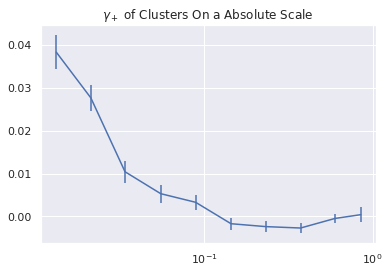

Aggregated xi:
[-27.4353 -43.3349 -25.8444 -21.761  -22.7732  18.7487  38.9824  59.4357
  11.2208  -3.3547]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3099.0453  -6041.5111  -8395.6903 -11868.503  -16662.5161 -21515.1627
 -24144.0434 -21789.4878 -12501.6194  -1312.8811]
------------------------------------------------------------------------------
Aggregated npairs:
[  716.  1567.  2478.  4093.  6878. 11102. 16500. 22080. 24177.  7971.]
------------------------------------------------------------------------------
Mean xi:
[-0.0383 -0.0277 -0.0104 -0.0053 -0.0033  0.0017  0.0024  0.0027  0.0005
 -0.0004]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3283 -3.8555 -3.3881 -2.8997 -2.4226 -1.938  -1.4633 -0.9868 -0.5171
 -0.1647]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

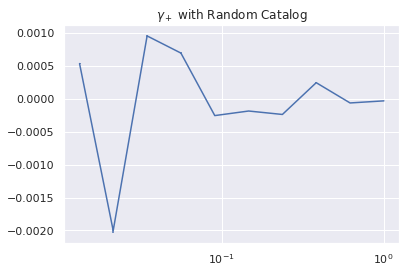

[ 5.3807e-04 -2.0032e-03  9.5860e-04  6.9755e-04 -2.5362e-04 -1.8407e-04
 -2.3639e-04  2.4706e-04 -6.1347e-05 -2.9438e-05]
[-8.3424e-06  3.1058e-05 -1.4862e-05 -1.0815e-05  3.9322e-06  2.8539e-06
  3.6650e-06 -3.8305e-06  9.5114e-07  4.5641e-07]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

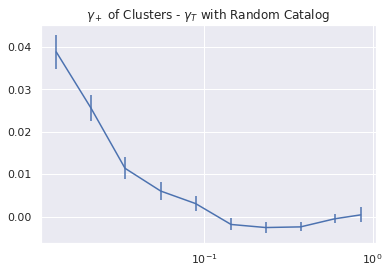

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

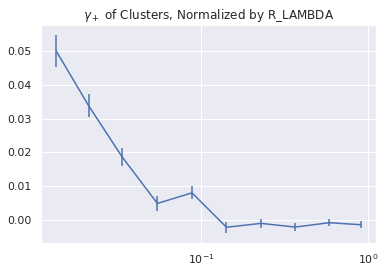

Aggregated xi:
[-19.8059 -36.333  -38.2116 -15.2512 -42.3117  19.5792  14.9155  42.4258
  21.624   29.6157]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1703.66    -4141.2036  -6953.6873  -9195.9015 -12910.412  -17022.3822
 -20181.8071 -19444.8718 -12818.9093  -1970.8026]
------------------------------------------------------------------------------
Aggregated npairs:
[  396.  1074.  2049.  3164.  5316.  8720. 13671. 19361. 24085. 19835.]
------------------------------------------------------------------------------
Mean xi:
[-0.05   -0.0338 -0.0186 -0.0048 -0.008   0.0022  0.0011  0.0022  0.0009
  0.0015]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3022 -3.8559 -3.3937 -2.9064 -2.4286 -1.9521 -1.4762 -1.0043 -0.5322
 -0.0994]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)